<a href="https://colab.research.google.com/github/habiib1999/Kmeans_Ncut_ClusteringEvaluation/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math; #For pow and sqrt
import sys;
from random import shuffle, uniform;
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import itertools
import random


def FindNearshCentroid(means,item):
    
    minimum = sys.maxsize
    index = -1;

    for i in range(len(means)):
        #Ecludean distance
        dis = np.linalg.norm(item-means[i])

        if(dis < minimum):
            minimum = dis;
            index = i;
    
    return index;


def UpdateCentroids(clusters_data, items, centroids):

    for i in range( len(clusters_data) ):
        new_centroid_sum_x = 0
        new_centroid_sum_y = 0
        for j in range( len(clusters_data[i]) ):
            index = clusters_data[i][j]
            new_centroid_sum_x += items[index][0]
            new_centroid_sum_y += items[index][1]
        centroids[i][0] = new_centroid_sum_x/float(j+1)
        centroids[i][1] = new_centroid_sum_y/float(j+1)
    return centroids



def groupToCentroid(centroids,items):
    clusters_size = [0 for i in range(len(centroids))]
    clusters_data = [[] for i in range(len(centroids))]; #Init clusters
    for i in range(len(items)):
        item = items[i];           
        centroid_index = FindNearshCentroid(centroids,item);
        clusters_size[centroid_index] += 1;
        clusters_data[centroid_index].append(i)
    return clusters_data, clusters_size

def initializeCentroids(k,items):
    centroids = [[0 for i in range(len(items[0]))] for j in range(k)] #Init centroids array
    centroids = np.array(centroids)
    #print(len(centroids))
    randomIndexes = random.sample(range(0, 24), k)
    #print(randomIndexes)
    for i in range(len(randomIndexes)):
      #print(centroids.shape)
      #print(items.shape)
      centroids[i] = items[randomIndexes[i]]
    return centroids

def KMeans(k,items):

    iterations = 0
    converge_counter = 0
    # initialize centroids
    centroids = [[] for i in range(k)]
    centroids = np.array(centroids)
    centroids = initializeCentroids(k,items)

    old_centroids = [[] for i in range(len(centroids))]; 
    old_centroids = np.array(old_centroids)
    while np.array_equal(old_centroids, centroids) != True :
      
      converge_counter = converge_counter + 1
      clusters_data , clusters_size = groupToCentroid(centroids, items)
      old_centroids = np.copy(centroids)
      centroids = UpdateCentroids(clusters_data, items, centroids) 
      #print("old centroids  = ", old_centroids)
      #print("new centroids  = ", centroids)


      colors = itertools.cycle(["r", "b", "g", "c" , "m" , "y"])
      fig = plt.figure(figsize=(10, 10))
      for i in range(len(clusters_data)):

        item_index_array = clusters_data[i]
        point_color = next(colors)
        for j in item_index_array:
          
          plt.scatter(items[j][0], items[j][1], color = point_color)
          
      plt.show()

      print("CLUSTERS ---------------------------------",clusters_data)
      return clusters_data
    


#Q2

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from numpy import linalg as LA
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
def NCuts(k,items):

    knnGraph = kneighbors_graph(items, 4, mode='connectivity', include_self=True)

    similarityMatrix = np.array(knnGraph.toarray())
    #print(similarityMatrix)
    # CALCULATE DEGREE MATRIX
    degree = np.zeros(len(similarityMatrix)) 
    # calculate the sums along rows and sum along columns
    colsum = similarityMatrix.sum(axis=0)
    rowsum = similarityMatrix.sum(axis=1)
    #print("column sum :",colsum)
    #print("row sum :",rowsum)

    # loop through matrix and add up all degree connections
    for j in range(0, len(similarityMatrix)):
        degree[j] = colsum[j] + rowsum[j] -1

    # get the diagonal entries to correct the for loop oversumming
    A = similarityMatrix.diagonal()
    d = A.flat
    diagMat = list(d)
    degreeMatrix = np.diag(degree - diagMat)

    # print the degree of connectivity matrix 
    #print( degreeMatrix )

    # CALCULATE LABLACIAN MATRIX
    L = degreeMatrix - similarityMatrix
    degreeMatrixInverse = np.linalg.inv(degreeMatrix)
    La = np.matmul(degreeMatrix,L)




    value, vector = LA.eig(La)
    #print(f"eigenValue:\n{np.diag(value)}\n")
    #print(f"eigenVector:\n{vector}\n")


    # Make a list of (eigenvalue, eigenvector) tuples
    eig_pairs = [(np.abs(value[i]), vector[:,i]) for i in range(len(value))]
    # Sort the (eigenvalue, eigenvector) 
    eig_pairs.sort(key=lambda x: x[0], reverse=False)
    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    #print('Eigenvalues in descending order:')
    #print(f"eigen pairs value & vector ordered:\n{eig_pairs}\n")

    eigenVectors = [[0 for i in range(24)] for j in range(k)] #Init centroids array
    for i in range(k):
      eigenVectors[i] = eig_pairs[i][1].reshape(24,1)
      #print("EIGEN VECTOR",eigenVectors[i])
    eigenVector = np.column_stack((eigenVectors ))
    #print("NEW EIGEN : ",eigenVector)
    for i in range(len(eigenVector)):
      eigenVector[i] = eigenVector[i]/np.linalg.norm(eigenVector[i])
    #print("NORMALIZED EIGEN : ", eigenVector)


    plt.figure(figsize=(16, 8))
    plt.scatter(eigenVector[:,0], eigenVector[:,1])
    plt.show()
    KMeans(k,eigenVector)



# Q3

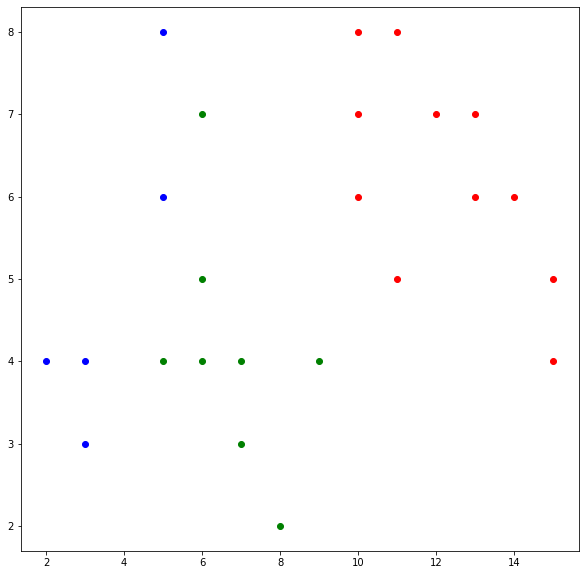

CLUSTERS --------------------------------- [[1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20], [0, 7, 15, 16, 21], [3, 10, 11, 17, 18, 19, 22, 23]]


In [ ]:
items = np.array([ [ 5, 8],
                      [ 10, 8],
                      [ 11, 8],
                      [ 6, 7],
                      [ 10, 7],
                      [ 12, 7],
                      [ 13, 7],
                      [ 5, 6],
                      [ 10, 6],
                      [ 13, 6],
                      [ 6, 5],
                      [ 9, 4],
                      [ 11, 5],
                      [ 14, 6],
                      [ 15, 5],
                      [ 2, 4], 
                      [ 3, 4],
                      [ 5, 4],
                      [ 6, 4],
                      [ 7, 4],
                      [ 15, 4],
                      [ 3, 3],
                      [ 7, 3],
                      [ 8, 2] ] ,dtype = object)
    
T1 = np.array([       [ 2, 4], 
                      [ 3, 4],
                      [ 3, 3]  ] ,dtype = object)

T2 = np.array([       [ 5, 8],
                      [ 6, 7],
                      [ 5, 6],
                      [ 6, 5],
                      [ 9, 4],
                      [ 5, 4],
                      [ 6, 4],
                      [ 7, 4],
                      [ 7, 3],
                      [ 8, 2] ] ,dtype = object)
T3 = np.array([ 
                      [ 10, 8],
                      [ 11, 8],
                      [ 10, 7],
                      [ 12, 7],
                      [ 13, 7],
                      [ 10, 6],
                      [ 13, 6],
                      [ 11, 5],
                      [ 14, 6],
                      [ 15, 5],
                      [ 15, 4], ] ,dtype = object)
clustersLabels = KMeans(3,items)

#PURITY 
puritySum = 0


# MAIN

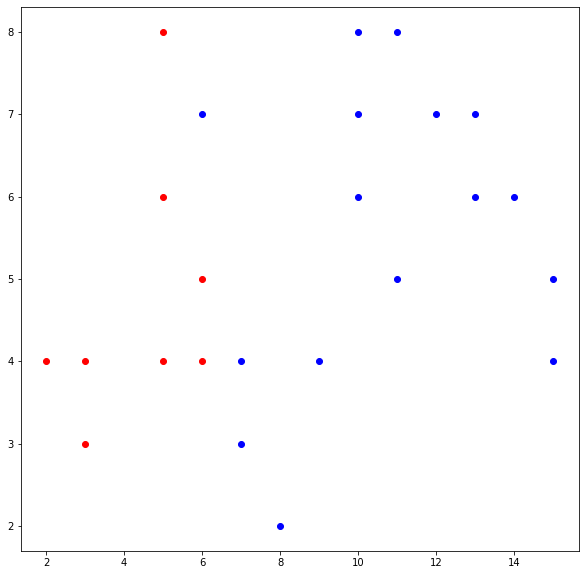

CLUSTERS --------------------------------- [[0, 7, 10, 15, 16, 17, 18, 21], [1, 2, 3, 4, 5, 6, 8, 9, 11, 12, 13, 14, 19, 20, 22, 23]]


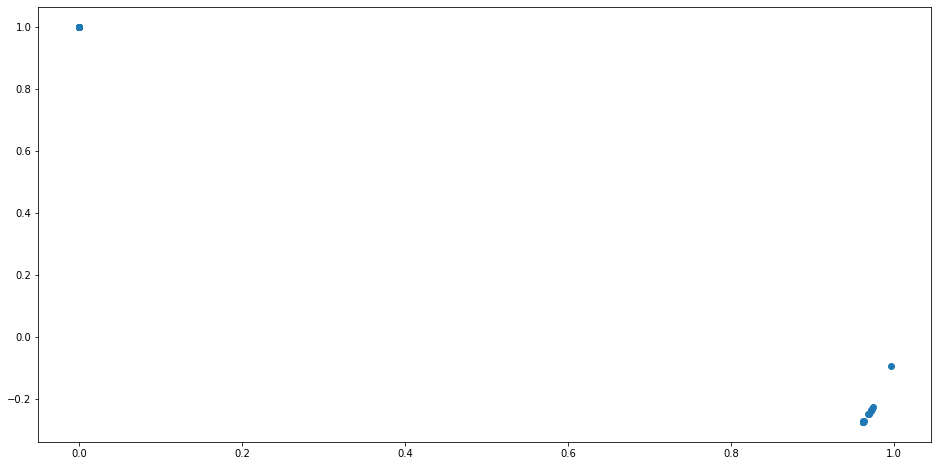

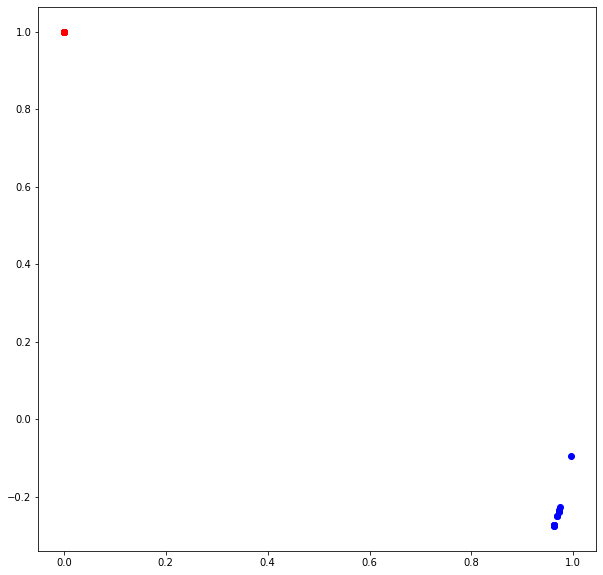

CLUSTERS --------------------------------- [[1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20], [0, 3, 7, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23]]


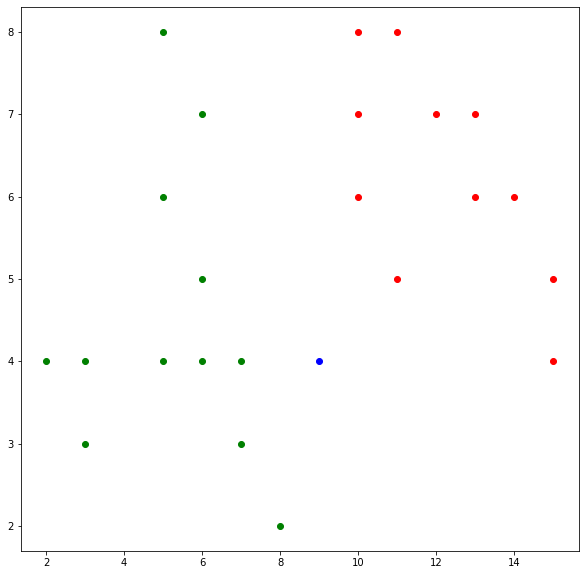

CLUSTERS --------------------------------- [[1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20], [11], [0, 3, 7, 10, 15, 16, 17, 18, 19, 21, 22, 23]]


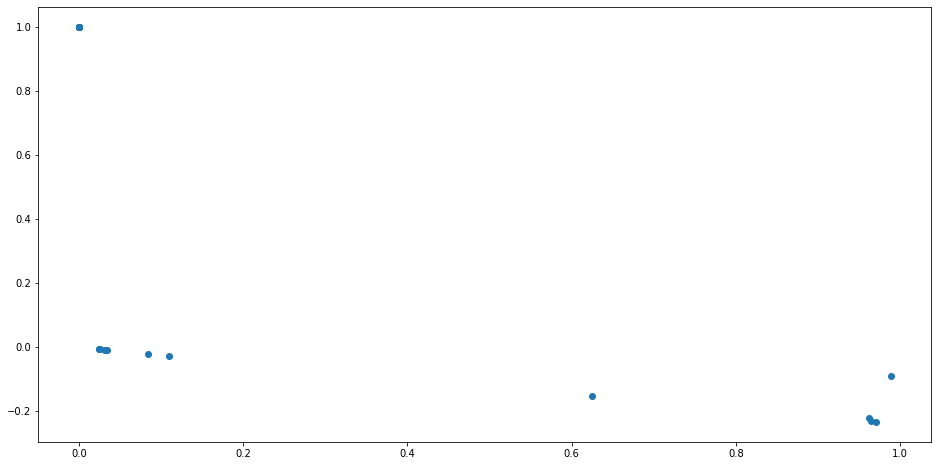

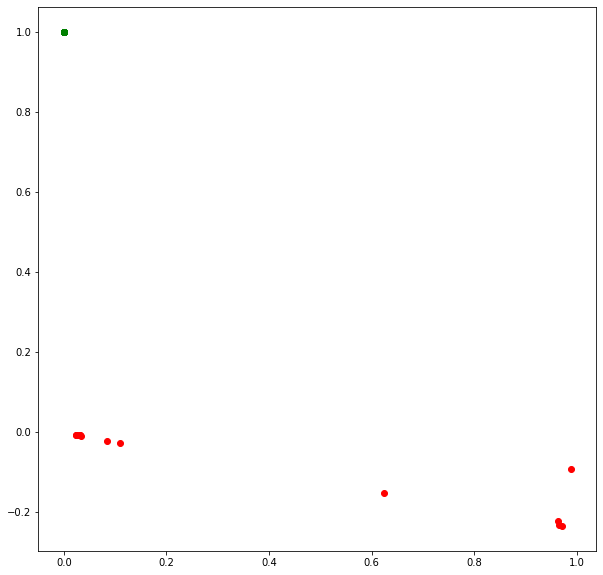

CLUSTERS --------------------------------- [[0, 3, 7, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23], [], [1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20]]


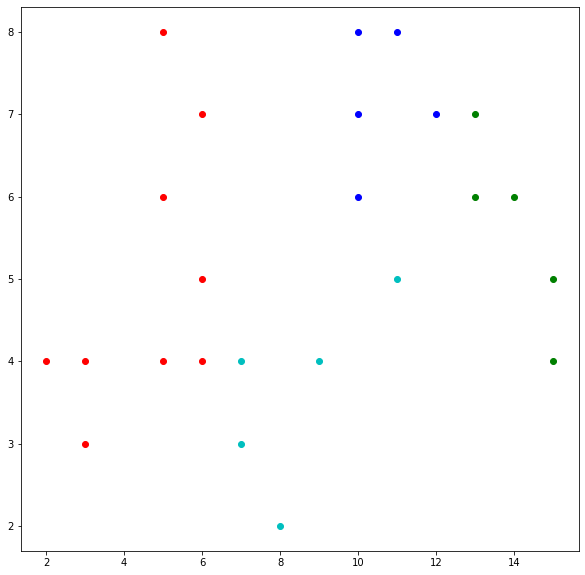

CLUSTERS --------------------------------- [[0, 3, 7, 10, 15, 16, 17, 18, 21], [1, 2, 4, 5, 8], [6, 9, 13, 14, 20], [11, 12, 19, 22, 23]]


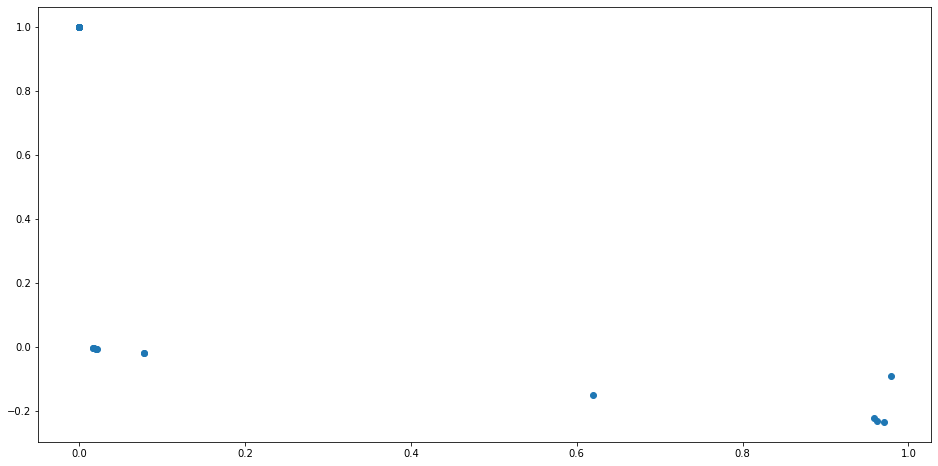

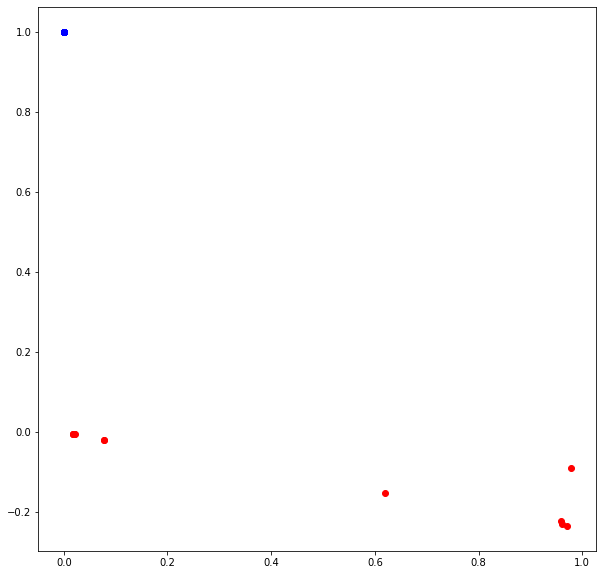

CLUSTERS --------------------------------- [[0, 3, 7, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23], [1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20], [], []]


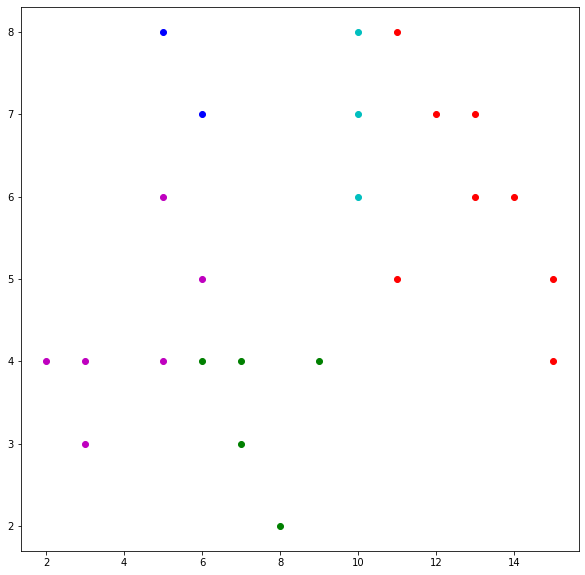

CLUSTERS --------------------------------- [[2, 5, 6, 9, 12, 13, 14, 20], [0, 3], [11, 18, 19, 22, 23], [1, 4, 8], [7, 10, 15, 16, 17, 21]]


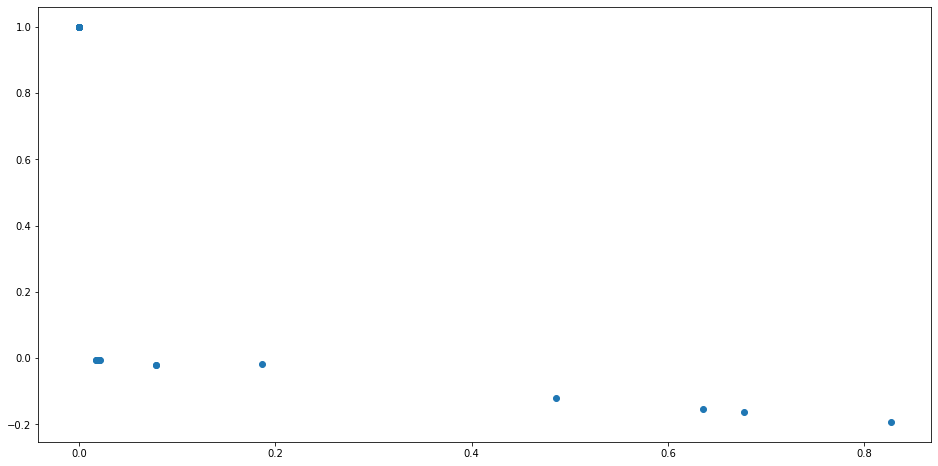

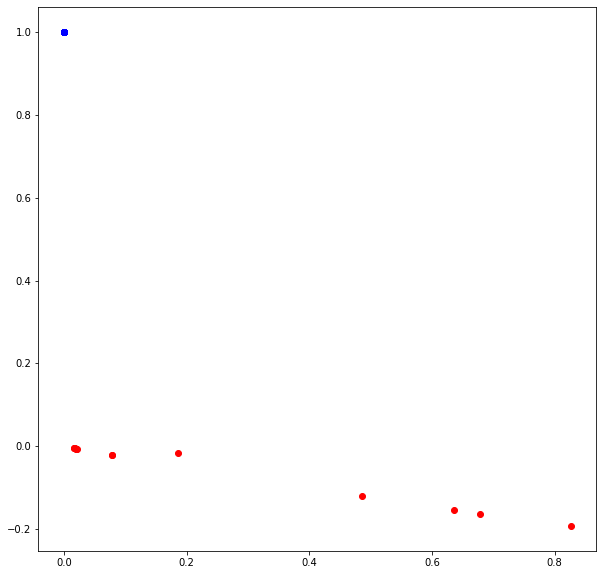

CLUSTERS --------------------------------- [[0, 3, 7, 10, 11, 15, 16, 17, 18, 19, 21, 22, 23], [1, 2, 4, 5, 6, 8, 9, 12, 13, 14, 20], [], [], []]


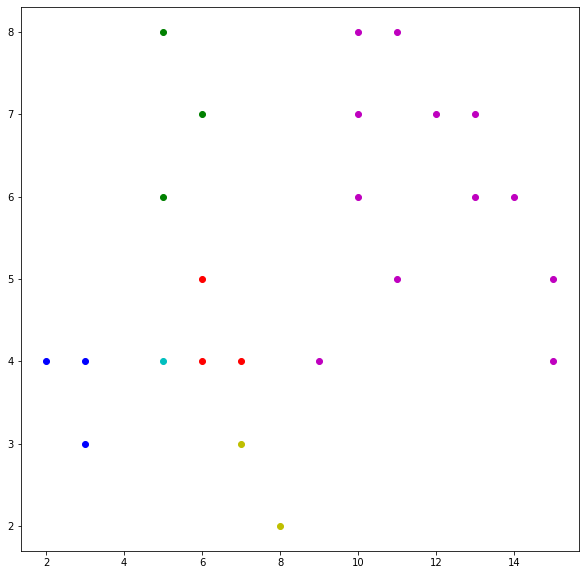

CLUSTERS --------------------------------- [[10, 18, 19], [15, 16, 21], [0, 3, 7], [17], [1, 2, 4, 5, 6, 8, 9, 11, 12, 13, 14, 20], [22, 23]]


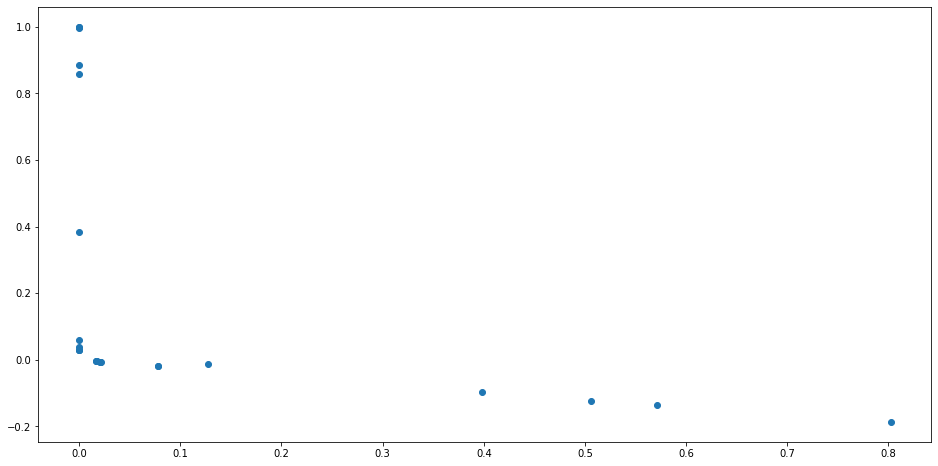

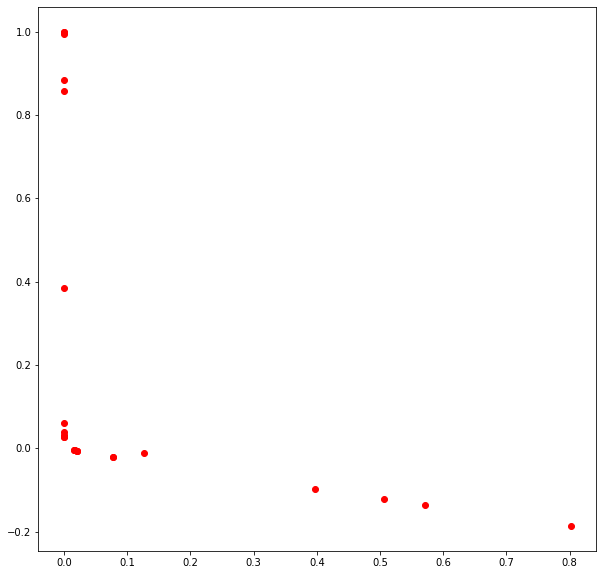

CLUSTERS --------------------------------- [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [], [], [], [], []]


In [ ]:
###_Main_###
def main():
    items = np.array([ [ 5, 8],
                      [ 10, 8],
                      [ 11, 8],
                      [ 6, 7],
                      [ 10, 7],
                      [ 12, 7],
                      [ 13, 7],
                      [ 5, 6],
                      [ 10, 6],
                      [ 13, 6],
                      [ 6, 5],
                      [ 9, 4],
                      [ 11, 5],
                      [ 14, 6],
                      [ 15, 5],
                      [ 2, 4], 
                      [ 3, 4],
                      [ 5, 4],
                      [ 6, 4],
                      [ 7, 4],
                      [ 15, 4],
                      [ 3, 3],
                      [ 7, 3],
                      [ 8, 2] ] ,dtype = object)
    
    k = [2,3,4,5,6] 
    #print('origional points :')
    #fig = plt.figure(figsize=(10, 10))
    #plt.scatter(items[:, 0], items[:, 1])
    #plt.show()

    centroids = np.array( [ items[0],
                            items[10],
                            items[21] ] ,dtype = object)
    
    k = [2,3,4,5,6] 
    for n in k:
        KMeans(n,items)
        NCuts(n,items)



if __name__ == "__main__":
    main();